In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [60]:
df = pd.read_csv('./Customer_Data.csv', sep=';', encoding='ISO-8859-1')
df.head(5)

,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
0,C10001,5323.148883,0.250693,26344.07220,38237.442520,3727.113162,15708.239680,0.496536,0.464442,0.821611,0.194502,100,77,16819.48004,21337.027460,39452.95812,0.817907,7
1,C10002,12726.638120,0.791307,37958.51902,5690.742440,18733.810960,38284.354430,0.699457,0.250327,0.654863,1.083902,78,156,15617.57058,8000.183624,63013.74848,0.343119,9
2,C10003,4305.572068,0.176531,28392.95334,36009.470090,2873.383232,14294.185030,0.419764,0.523662,0.899912,0.207049,72,81,15515.58621,27111.360490,NaN,0.829074,6
3,C10004,4740.988511,0.178076,27399.00384,38246.863490,3402.853375,6936.812518,0.439666,0.606597,0.783129,0.228299,78,83,12926.58797,23919.113400,38444.21998,0.883984,7
4,C10005,13820.920640,0.826914,42214.02163,7341.007821,19273.070990,40091.347850,0.821412,0.283579,0.501361,1.106350,88,182,14404.70507,6994.688474,62041.61734,0.383186,10


In [61]:
df.shape

(8950, 18)

## Comparación con el diccionario de datos

Las siguientes columnas son todas númericas a excepción de ID, el cual es una cadena de caracteres. Además, se verifica que correspondan los nombres de las columnas en el diccionario de datos y en el conjunto de datos.

In [62]:
df.dtypes

ID                      object
SALDO                  float64
F_SALDO                float64
COMPRAS                float64
COMPRAS_PUNTUALES      float64
COMPRAS_PLAZOS         float64
AVANCE_EFECTIVO        float64
F_COMPRAS              float64
F_COMPRAS_PUNTUALES    float64
F_COMPRAS_PLAZOS       float64
F_AVANCE_EFECTIVO      float64
P_AVANCE_EFECTIVO        int64
P_COMPRAS                int64
LÍMITE_CREDITO         float64
PAGOS                  float64
PAGOS_MINIMOS          float64
F_PAGOS_COMPLETOS      float64
MESES_CLIENTE            int64
dtype: object

# Perfilamiento

Primero que todo hagamos el análisis de las columnas en base a su distribución. En cuanto a las distribuciones se nota lo siguiente:

| Columna | Estadisticas |
| - | - |
| SALDO | Una distribución bimodal. Una parte de los datos se agrupan por debajo de 100000 y otros por encima de este límite. |
| F_SALDO | Una distribución bimodal. Una parte de los datos se encuentra por debajo de 0.4 y otra parte de los mismos por encima de este número |
| COMPRAS | Una distribución multimodal. Tenemos tres picos pronunciados, uno de ellos en 80000, otro cerca de 270000 y el ultimo por 420000. | 
| COMPRAS_PUNTUALES | Una distribución bimodal. Los datos se agrupan por debajo o por encima de 20000. |
| COMPRAS_PLAZOS | Una distribución multimodal. Los datos se agrupan en 3 grupos marcados. Por debajo de 8000, por encima de 8000 y debajo de 15000, y el último grupo por encima de 15000. | 
| AVANCE_EFECTIVO | Una distribución mas que todo bimodal. Se agrupan los registros por debajo y arriba de 30000. |
| F_COMPRAS | Una distribución bimodal. Se observan dos grupos principales: uno alrededor de 0.4 y otro cerca de 0.8, lo que sugiere que hay clientes con diferentes patrones de frecuencia de compra. |
| F_COMPRAS_PUNTUALES | Una distribución bimodal. Los datos se agrupan en dos picos principales, uno alrededor de 0.3 y otro cerca de 0.7, indicando que los clientes tienden a realizar compras puntuales con distintas frecuencias. |
| F_COMPRAS_PLAZOS  | Una distribución bimodal. Los datos se agrupan alrededor de 0.2 y entre 0.5 y 0.8, lo que indica que hay clientes que realizan compras a plazos con distintas frecuencias. |
| F_AVANCE_EFECTIVO | Una distribución bimodal. Se observa un grupo alrededor de 0.2 y otro cercano a 1, lo que sugiere que hay clientes que realizan avances en efectivo con diferentes patrones. |
| P_AVANCE_EFECTIVO | Una distribución unimodal con una concentración de datos entre 70 y 100, con una leve cola hacia valores más altos. Indica que la mayoría de los clientes realiza avances en efectivo en ese rango. |
| P_COMPRAS | Una distribución bimodal. Se observan dos grupos principales: uno alrededor de 100 y otro cercano a 200-250, lo que sugiere diferentes patrones de compra entre los clientes. | 
| LIMITE_CREDITO | Una distribución multimodal. Se observan tres grupos principales: uno alrededor de 5000, otro entre 10000 y 20000, y un último grupo cerca de 30000. |
| PAGOS | Una distribución multimodal con tres picos bien definidos: uno alrededor de 10000, otro cerca de 20000-30000, y un tercero alrededor de 50000. | 
| PAGOS_MINIMOS | Una distribución multimodal. Se observan tres grupos: uno cerca de 20000, otro alrededor de 40000 y el último en 60000-70000. |
| F_PAGOS_COMPLETOS | Una distribución bimodal. Los datos se agrupan alrededor de 0.2 y 0.8, indicando que hay clientes que pagan frecuentemente y otros que lo hacen con menor regularidad. |
| MESES_CLIENTE | Una distribución multimodal. Se observan que los datos estan entre 6 a 12 meses. 10 meses tiene la mayor frecuencia y 12 meses la menor. |

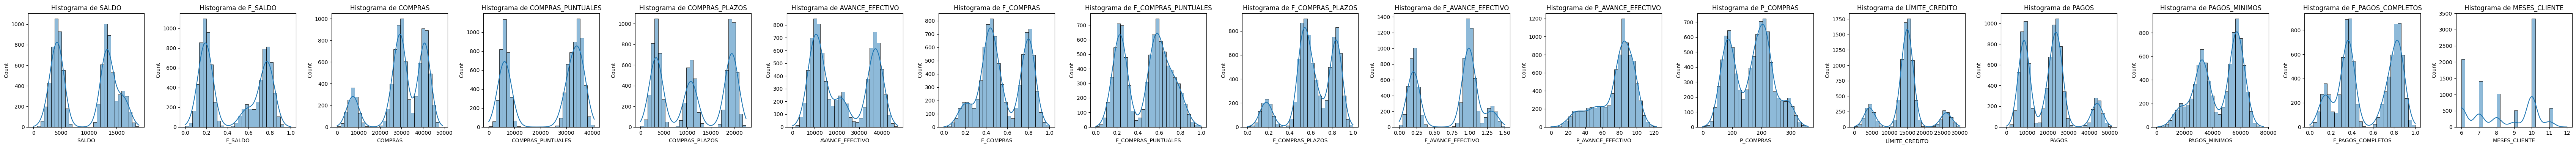

In [63]:
number_cols = df.select_dtypes(include = ['int64','float']).columns
num_cols = len(number_cols)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(4 * num_cols, 4))

# Graficar histogramas para cada columna numérica
for ax, col in zip(axes, number_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=ax)
    ax.set_title(f'Histograma de {col}')

plt.tight_layout()
plt.show()

Sobre las estadisticas descriptivas de cada una de las columnas se nota que en general los datos tienen una desviación estandar bastante alta en comparación con los rangos en los que se definen, esto se justifica con las distribuciones graficadas arriba. Esto debido a que no son distribuciones unimodales, por lo tanto, la varianza entre los datos es bastante amplia. 

In [64]:
df[[col for col in number_cols if 'F_' not in col]].describe()

,SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,MESES_CLIENTE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000
mean,9382.387900,30525.873439,22913.665720,11407.851805,22573.474202,76.169162,164.981453,14696.640361,19824.347218,44222.977795,8.370615
std,5118.113559,11041.410943,13573.919086,7087.102996,12594.295895,22.260935,71.322003,5537.074673,11069.268177,15468.314241,1.756035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,1006.064965,6.000000
25%,4275.036859,27106.651598,6698.252490,3736.720194,10944.431108,65.000000,97.000000,13487.727310,9329.603116,31572.127680,7.000000
50%,12007.718810,30934.582275,31011.033490,10832.141085,19465.792260,82.000000,176.000000,14942.545350,21367.621275,48780.271750,8.000000
75%,13740.565878,39825.160795,34495.416422,19127.083038,36150.722568,92.000000,216.000000,16269.727120,25219.127372,57761.175980,10.000000
max,19043.138560,49039.570000,40761.250000,22500.000000,47137.211760,123.000000,358.000000,30000.000000,50721.483360,76406.207520,12.000000


In [65]:
df[[col for col in number_cols if 'F_' in col]].describe()

,F_SALDO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,F_PAGOS_COMPLETOS
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.459205,0.559810,0.478032,0.623916,0.734946,0.545414
std,0.282998,0.214055,0.221873,0.208207,0.422563,0.267443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.188490,0.407273,0.250856,0.518231,0.230716,0.336732
50%,0.306650,0.505305,0.533521,0.607608,0.947651,0.432690
75%,0.756061,0.777084,0.649120,0.814929,1.029172,0.815178
max,1.000000,1.000000,1.000000,1.000000,1.500000,1.000000


# Calidad de datos

## Completitud

En la siguiente celda se nota que hay 313 registros con valores nulos en la columna `PAGOS_MINIMOS`, esto solo es el 3.5% de los datos totales. Además, tenemos un registro tiene la columna `LÍMITE_CREDITO` en nulo.

In [66]:
df.isna().sum()/df.shape[0]*100

ID                     0.000000
SALDO                  0.000000
F_SALDO                0.000000
COMPRAS                0.000000
COMPRAS_PUNTUALES      0.000000
COMPRAS_PLAZOS         0.000000
AVANCE_EFECTIVO        0.000000
F_COMPRAS              0.000000
F_COMPRAS_PUNTUALES    0.000000
F_COMPRAS_PLAZOS       0.000000
F_AVANCE_EFECTIVO      0.000000
P_AVANCE_EFECTIVO      0.000000
P_COMPRAS              0.000000
LÍMITE_CREDITO         0.011173
PAGOS                  0.000000
PAGOS_MINIMOS          3.497207
F_PAGOS_COMPLETOS      0.000000
MESES_CLIENTE          0.000000
dtype: float64

In [67]:
sim = SimpleImputer(strategy='mean')
df['LÍMITE_CREDITO'] = sim.fit_transform(df[['LÍMITE_CREDITO']])

En la siguiente ejecución se observa que los 313 registros con valores nulos en la columna `PAGOS_MINIMOS` presentan distribuciones muy similares a las del conjunto total de datos. Esto sugiere que estos registros constituyen una muestra representativa del total, sin presentar sesgos evidentes. Por esta razón, no resulta apropiado imputar un valor faltante en la columna `PAGOS_MINIMOS` utilizando un estadístico central (como la media o la mediana), ya que esto podría distorsionar la variabilidad natural del grupo al que dichos registros podrían pertenecer.

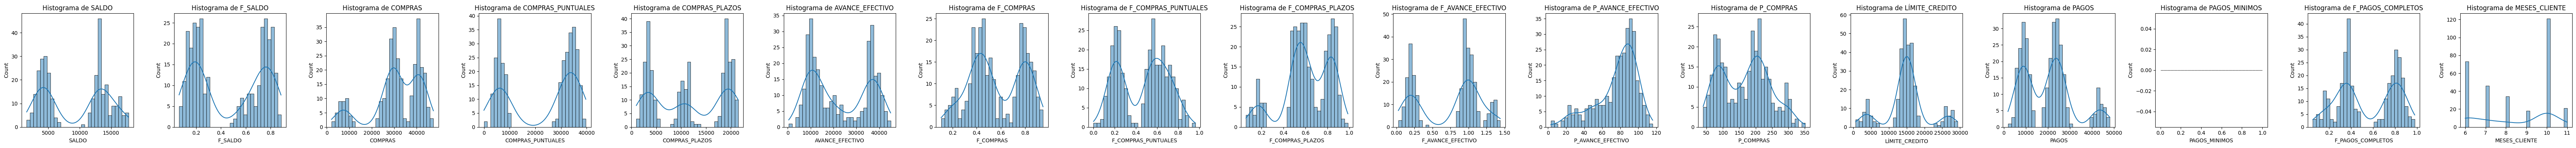

In [68]:
complt = df[df['PAGOS_MINIMOS'].isna()].copy()

number_cols = complt.select_dtypes(include = ['int64','float']).columns
num_cols = len(number_cols)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(4 * num_cols, 4))

# Graficar histogramas para cada columna numérica
for ax, col in zip(axes, number_cols):
    sns.histplot(complt[col], bins=30, kde=True, ax=ax)
    ax.set_title(f'Histograma de {col}')

plt.tight_layout()
plt.show()

Por lo cual, se opta por utilizar `KNNImputer` para realizar la imputación de valores nulos. Esto debido a que se tendría en cuenta el "grupo" al que pertenecen, en base a las demás caracteristicas, para estimar los valores nulos. Haciendo este procedimiento se logra evitar la eliminación de 300 registros que son representativos. Por lo pronto se utiliza el parámetro `n_neighbors` con 5. Esto ya que permite que la imputación refleje mejor el comportamiento de clientes con características similares en términos de pagos, saldo y límite de crédito. Al realizar este proceso se puede ver que ya no existen valores nulos. 

In [69]:
knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputed_array = knn_imputer.fit_transform(df[[col for col in df.columns if col != 'ID']])

not_ID = [col for col in df.columns if col != 'ID']
imputed_df = pd.DataFrame(imputed_array, index=df.index, columns=not_ID)

imputed_df = pd.concat([df['ID'], imputed_df], axis=1)

Podemos ver que ya no tenemos ningun valor nulo.

In [70]:
imputed_df.isna().sum()

ID                     0
SALDO                  0
F_SALDO                0
COMPRAS                0
COMPRAS_PUNTUALES      0
COMPRAS_PLAZOS         0
AVANCE_EFECTIVO        0
F_COMPRAS              0
F_COMPRAS_PUNTUALES    0
F_COMPRAS_PLAZOS       0
F_AVANCE_EFECTIVO      0
P_AVANCE_EFECTIVO      0
P_COMPRAS              0
LÍMITE_CREDITO         0
PAGOS                  0
PAGOS_MINIMOS          0
F_PAGOS_COMPLETOS      0
MESES_CLIENTE          0
dtype: int64

Volvemos a gráficar las distribuciones de las columnas en el conjunto de datos y notamos que no hay una diferencia significativa entre las distribuciones antes y después de resolver el problema de completitud. 

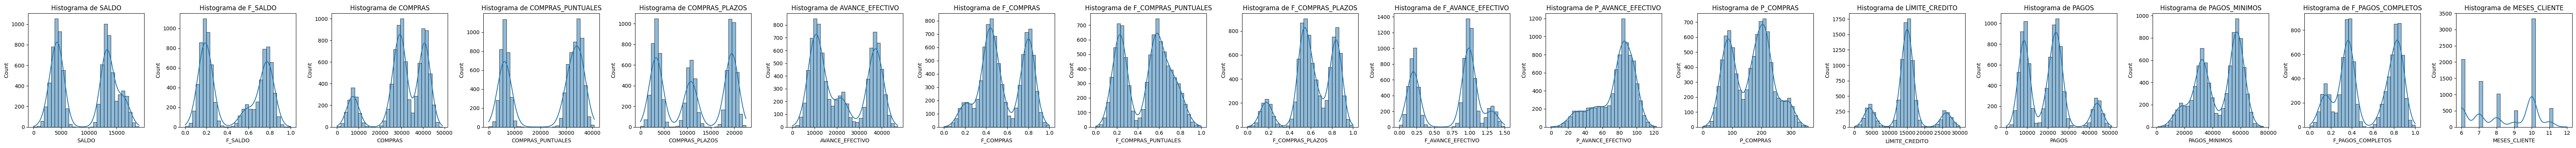

In [71]:
number_cols = imputed_df.select_dtypes(include = ['int64','float']).columns
num_cols = len(number_cols)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(4 * num_cols, 4))

# Graficar histogramas para cada columna numérica
for ax, col in zip(axes, number_cols):
    sns.histplot(imputed_df[col], bins=30, kde=True, ax=ax)
    ax.set_title(f'Histograma de {col}')

plt.tight_layout()
plt.show()

## Unicidad

En esta sección se verifican que no hayan duplicados en base a todo el registro. Esto se verifica facilmente ya que en la siguiente celda se revisa si hay duplicados, como no los hay se procede con la siguiente dimensión de la calidad de datos.

In [72]:
imputed_df.duplicated().sum()

0

## Validez (externa)

En cuanto a la validez podemos revisar los rangos de las frecuencias, que se supone deben ir de 0 a 1 según el diccionario. Notamos que tenemos un único problema, este es que cerca del 50% de los registros de `F_AVANCE_EFECTIVO` se encuentran debajo de 1. Luego, en el cuartil del 75% los datos empiezan a ser mayores a 1. Además de este problema, todas las demás variables cumplen con el rango de las variables según el diccionario de datos.

In [73]:
cols_ran = [col for col in imputed_df if 'F_' in col]
imputed_df[cols_ran].describe()

,F_SALDO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,F_PAGOS_COMPLETOS
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.459205,0.559810,0.478032,0.623916,0.734946,0.545414
std,0.282998,0.214055,0.221873,0.208207,0.422563,0.267443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.188490,0.407273,0.250856,0.518231,0.230716,0.336732
50%,0.306650,0.505305,0.533521,0.607608,0.947651,0.432690
75%,0.756061,0.777084,0.649120,0.814929,1.029172,0.815178
max,1.000000,1.000000,1.000000,1.000000,1.500000,1.000000


El problema anterior con la columna `F_AVANCE_EFECTIVO` se soluciona escalando estos valores de 0 a 1, para esto se puede aplicar la siguiente formula:

$$
z_i = \frac{x_i - x_{\min}}{x_{\max} - x_{\min}}
$$

O se puede usar `MinMaxScaler` de Scikit con el rango de 0 a 1. Se opta por utilizar la formula por la facilidad.

In [74]:
# Método 1
fae = imputed_df['F_AVANCE_EFECTIVO']
imputed_df['F_AVANCE_EFECTIVO'] = (fae - fae.min()) / (fae.max() - fae.min())

# Método 2
# mm_scaler = MinMaxScaler((0,1))
# imputed_df['F_AVANCE_EFECTIVO'] = mm_scaler.fit_transform(imputed_df[['F_AVANCE_EFECTIVO']])

imputed_df[['F_AVANCE_EFECTIVO']].describe()

,F_AVANCE_EFECTIVO
count,8950.000000
mean,0.489964
std,0.281708
min,0.000000
25%,0.153810
50%,0.631767
75%,0.686114
max,1.000000


En la siguiente celda se puede observar que la distribución de los datos no se ve afectada por esta distribución, por lo tanto, parece ser la mejor opción para resolver este problema.

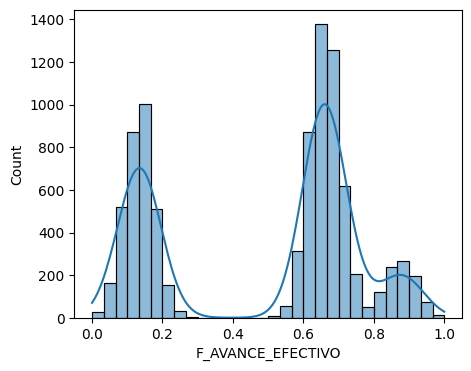

In [75]:
fig, axis = plt.subplots(figsize=(5,4))
sns.histplot(imputed_df['F_AVANCE_EFECTIVO'], kde=True, bins=30)
plt.show()

## Consistencia (interna)

En este caso no existen problemas de consistencia en los datos ya que no se observan contradicciones en las variables. Por ejemplo, en montos de compras, frecuencia de transacciones y pagos los valores siguen una lógica coherente con el comportamiento esperado de los clientes. Esto quiere decir que no hay  registros que presenten inconsistencias evidentes, como pagos negativos.

También se debe cumplir que no existen cantidades negativas en el conjunto de datos, debido a que se trabajan con conceptos no negativos, lo cual se cumple.

In [76]:
imputed_df.min()

ID                          C10001
SALDO                          0.0
F_SALDO                        0.0
COMPRAS                        0.0
COMPRAS_PUNTUALES              0.0
COMPRAS_PLAZOS                 0.0
AVANCE_EFECTIVO                0.0
F_COMPRAS                      0.0
F_COMPRAS_PUNTUALES            0.0
F_COMPRAS_PLAZOS               0.0
F_AVANCE_EFECTIVO              0.0
P_AVANCE_EFECTIVO              0.0
P_COMPRAS                      0.0
LÍMITE_CREDITO                50.0
PAGOS                          0.0
PAGOS_MINIMOS          1006.064965
F_PAGOS_COMPLETOS              0.0
MESES_CLIENTE                  6.0
dtype: object

# Transformaciones al dataset

En esta sección se opta por escalar los datos de 0 a 1 para llevar todas las variables a un rango en el que las mismas sean comparables entre sí.

In [77]:
transformed_df = imputed_df.copy()

sc = MinMaxScaler()
not_f = [col for col in imputed_df.columns if 'F_' not in col and 'ID' != col]
data = sc.fit_transform(imputed_df[not_f])

transformed_df[not_f] = data
transformed_df.describe()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.492691,0.459205,0.622474,0.562143,0.507016,0.478889,0.559810,0.478032,0.623916,0.489964,0.619261,0.460842,0.489036,0.390847,0.573112,0.545414,0.395102
std,0.268764,0.282998,0.225153,0.333010,0.314982,0.267184,0.214055,0.221873,0.208207,0.281708,0.180983,0.199223,0.184867,0.218236,0.204918,0.267443,0.292673
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.224492,0.188490,0.552751,0.164329,0.166076,0.232182,0.407273,0.250856,0.518231,0.153810,0.528455,0.270950,0.448676,0.183938,0.405599,0.336732,0.166667
50%,0.630554,0.306650,0.630809,0.760797,0.481428,0.412960,0.505305,0.533521,0.607608,0.631767,0.666667,0.491620,0.497240,0.421274,0.635234,0.432690,0.333333
75%,0.721549,0.756061,0.812103,0.846280,0.850093,0.766925,0.777084,0.649120,0.814929,0.686114,0.747967,0.603352,0.541553,0.497208,0.752772,0.815178,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Una vez se realiza el escalamiento de las caracteristicas notamos que se lleva a cabo esta transformación de manera exitosa y que las distribuciones de los datos se mantienen.

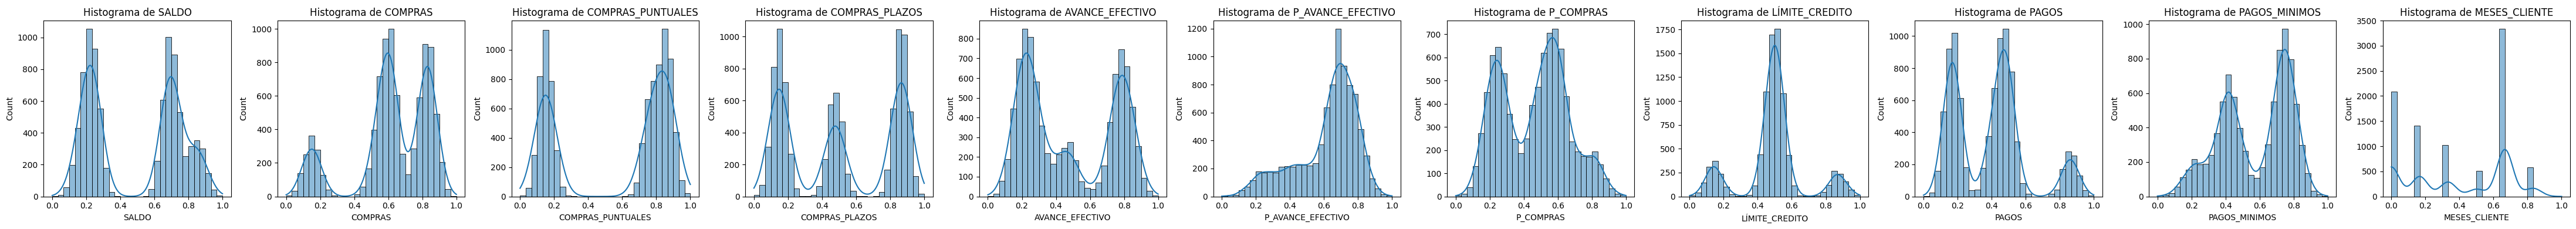

In [78]:
num_cols = len(not_f)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(4 * num_cols, 4))

# Graficar histogramas para cada columna numérica
for ax, col in zip(axes, not_f):
    sns.histplot(transformed_df[col], bins=30, kde=True, ax=ax)
    ax.set_title(f'Histograma de {col}')

plt.tight_layout()
plt.show()

## Grupos Naturales

Las relaciones elegidas en los scatter plots fueron seleccionadas estratégicamente para identificar patrones clave en el comportamiento de los tarjetahabientes. Estas combinaciones de variables permiten observar **grupos naturales** que revelan información valiosa para la segmentación. A continuación, explicamos la razón detrás de cada elección:

1. **Compras vs. Pagos**  
   - Permite diferenciar entre clientes que pagan el total, pagan parcialmente o apenas cumplen con el mínimo.  
   - Ayuda a identificar posibles **compradores compulsivos** y clientes de **alto riesgo**.

2. **Avance Efectivo vs. Límite de Crédito**  
   - Relaciona el uso de avances con el límite disponible, evidenciando **usuarios intensivos de crédito** vs. **clientes más conservadores**.  

3. **Frecuencia de Compras vs. Frecuencia de Pagos Completos**  
   - Distingue a clientes que pagan siempre el total (transactors) de los que refinancian (revolvers), clave para **gestión de cobranza y fidelización**.

4. **Compras vs. Pagos Mínimos**  
   - Permite identificar a quienes solo pagan el mínimo, lo que puede representar **riesgo financiero** si sus compras son altas.  

5. **Compras Puntuales vs. Compras a Plazos**  
   - Diferencia a quienes prefieren pagar de contado vs. quienes dependen del crédito, útil para diseñar **promociones y financiamiento**.

6. **Frecuencia de Avances vs. Importe Medio de Avance**  
   - Ayuda a entender la dependencia de los avances en efectivo y su impacto en la liquidez de los clientes.  

Cada relación fue elegida con el objetivo de segmentar a los clientes en **grupos accionables**

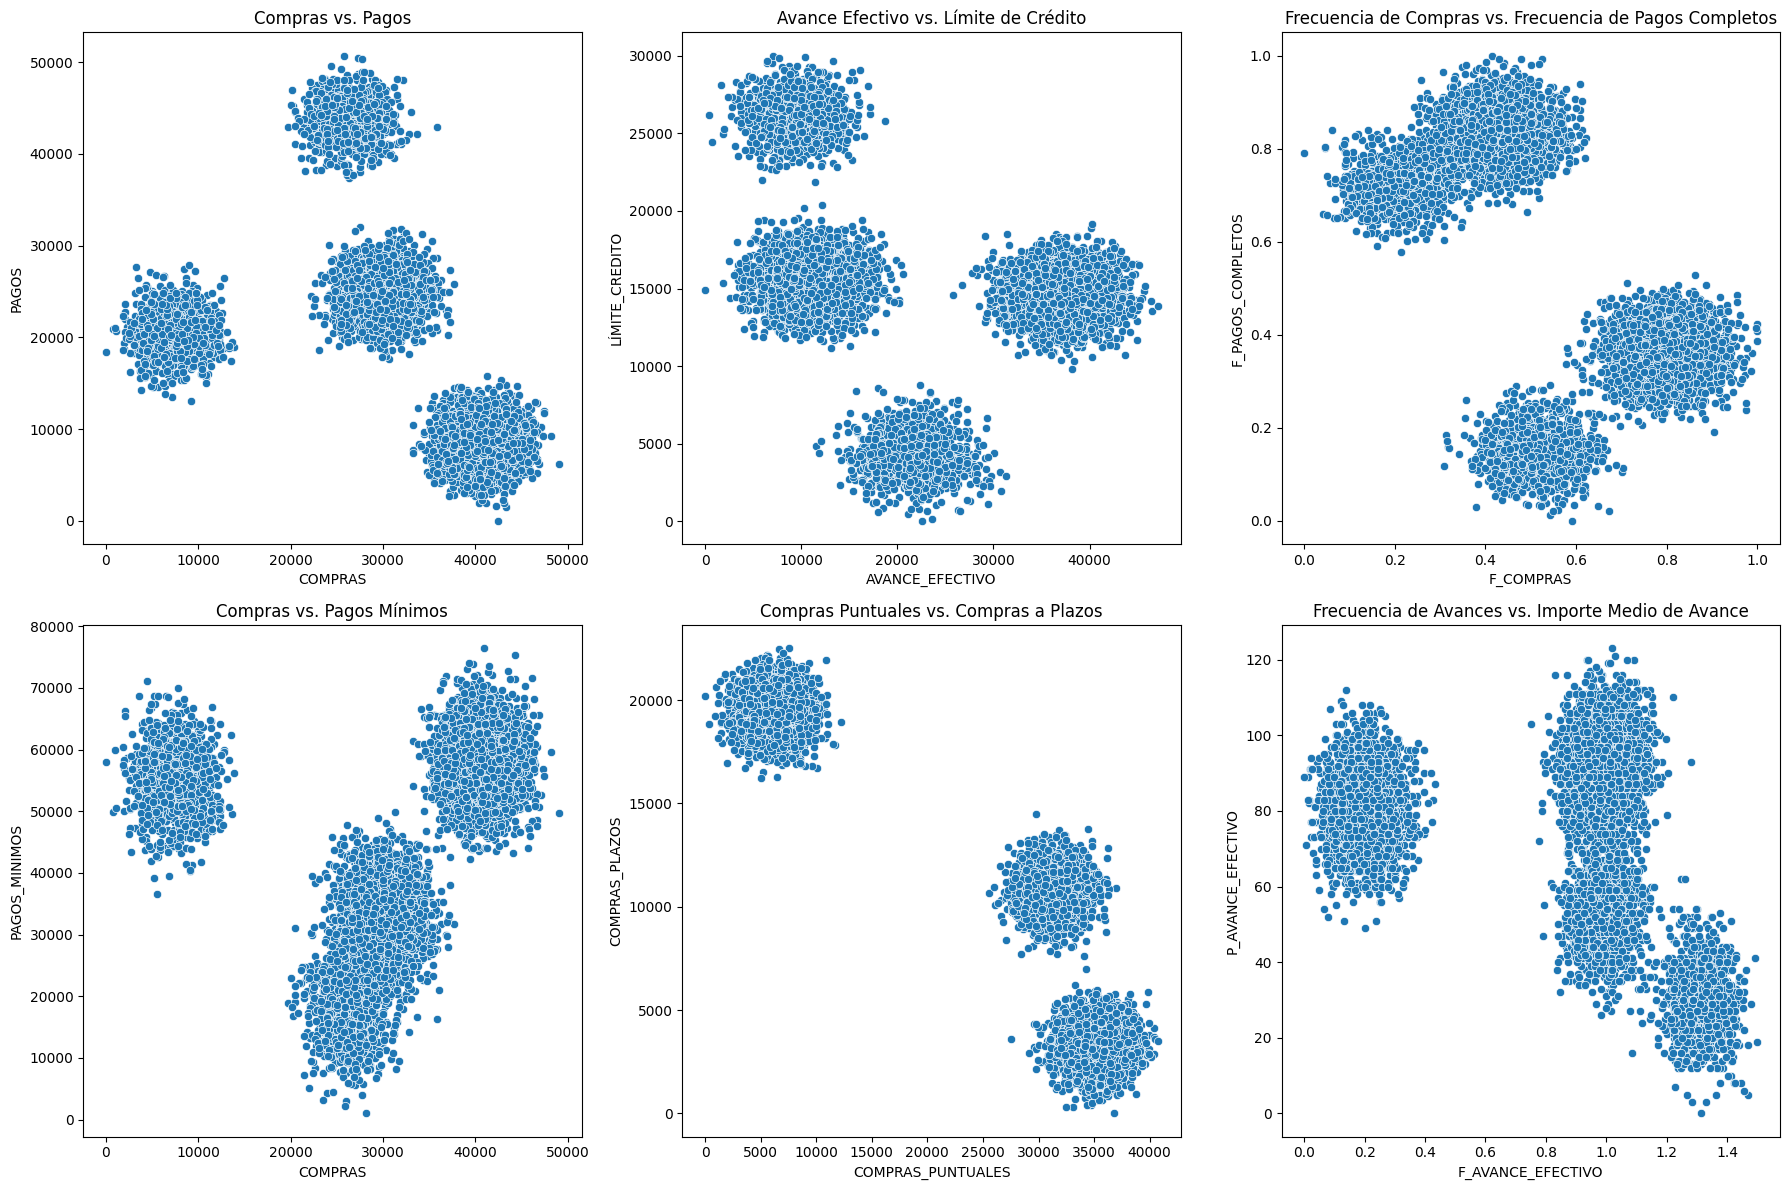

In [79]:

plt.figure(figsize=(18, 12))

# 1. COMPRAS vs. PAGOS
plt.subplot(2, 3, 1)
sns.scatterplot(data=df, x='COMPRAS', y='PAGOS')
plt.title('Compras vs. Pagos')
plt.xlabel('COMPRAS')
plt.ylabel('PAGOS')

# 2. AVANCE_EFECTIVO vs. LÍMITE_CREDITO
plt.subplot(2, 3, 2)
sns.scatterplot(data=df, x='AVANCE_EFECTIVO', y='LÍMITE_CREDITO')
plt.title('Avance Efectivo vs. Límite de Crédito')
plt.xlabel('AVANCE_EFECTIVO')
plt.ylabel('LÍMITE_CREDITO')

# 3. F_COMPRAS vs. F_PAGOS_COMPLETOS
plt.subplot(2, 3, 3)
sns.scatterplot(data=df, x='F_COMPRAS', y='F_PAGOS_COMPLETOS')
plt.title('Frecuencia de Compras vs. Frecuencia de Pagos Completos')
plt.xlabel('F_COMPRAS')
plt.ylabel('F_PAGOS_COMPLETOS')

# 4. PAGOS_MINIMOS vs. COMPRAS
plt.subplot(2, 3, 4)
sns.scatterplot(data=df, x='COMPRAS', y='PAGOS_MINIMOS')
plt.title('Compras vs. Pagos Mínimos')
plt.xlabel('COMPRAS')
plt.ylabel('PAGOS_MINIMOS')

# 5. COMPRAS_PUNTUALES vs. COMPRAS_PLAZOS
plt.subplot(2, 3, 5)
sns.scatterplot(data=df, x='COMPRAS_PUNTUALES', y='COMPRAS_PLAZOS')
plt.title('Compras Puntuales vs. Compras a Plazos')
plt.xlabel('COMPRAS_PUNTUALES')
plt.ylabel('COMPRAS_PLAZOS')

# 6. F_AVANCE_EFECTIVO vs. P_AVANCE_EFECTIVO
plt.subplot(2, 3, 6)
sns.scatterplot(data=df, x='F_AVANCE_EFECTIVO', y='P_AVANCE_EFECTIVO')
plt.title('Frecuencia de Avances vs. Importe Medio de Avance')
plt.xlabel('F_AVANCE_EFECTIVO')
plt.ylabel('P_AVANCE_EFECTIVO')

plt.tight_layout()
plt.show()

## Análisis de Gráficos de Segmentación

A continuación, presentamos nuestro análisis de los **seis scatter plots** generados, utilizando la información proporcionada por la empresa de tarjetas de crédito (FinanzasAlpes). Nuestro objetivo es identificar grupos naturales de clientes que faciliten la segmentación y la personalización de estrategias de marketing y servicio.

---

### 1. Compras vs. Pagos

**Observaciones:**

- Identificamos varias nubes de puntos que reflejan distintas combinaciones de compras y pagos.
- Vemos un grupo con **bajas compras y bajos pagos**, que sugiere clientes de uso mínimo.
- Otro grupo con **altas compras y altos pagos**, que indicaría heavy users responsables, pues gastan mucho pero también pagan montos elevados.
- Existe un grupo con **altas compras y pagos bajos**, lo cual puede implicar un comportamiento de compradores compulsivos o de alto riesgo de endeudamiento.

**Interpretación en el negocio:**

- Podríamos definir un segmento de **“heavy users responsables”** (alto gasto, alto pago).
- Un segmento de **“alto riesgo”** (alto gasto, bajo pago).
- Y un segmento de **“bajo uso”** (bajo gasto, bajo pago).

---

### 2. Avance Efectivo vs. Límite de Crédito

**Observaciones:**

- Distinguimos clientes con **bajo avance en efectivo y bajo límite**, que apenas hacen uso de su línea de crédito.
- Observamos también clientes con **alto avance en efectivo y alto límite**, lo cual podría implicar un uso intensivo del crédito.
- Hay grupos intermedios con un uso moderado tanto del límite como de los avances.

**Interpretación en el negocio:**

- Quienes utilizan muchos avances y tienen un límite elevado pueden considerarse **“usuarios intensivos de crédito”**, potencialmente con mayor riesgo o, en ciertos casos, mayor rentabilidad.
- Aquellos que casi no usan avances, pese a tener un límite alto, son más **conservadores**.

---

### 3. Frecuencia de Compras vs. Frecuencia de Pagos Completos

**Observaciones:**

- Identificamos clientes que **compran con alta frecuencia** y también **pagan el saldo completo** con regularidad: podrían ser los clientes “estrella”.
- Vemos otro grupo que **compra con alta frecuencia** pero **paga el saldo completo con poca frecuencia**: se trata de usuarios que podrían acumular deuda.
- Hay clientes que **compran poco** y **pagan completamente** de forma constante (uso esporádico pero cumplido).
- También detectamos un grupo de **baja frecuencia de compra** y **baja frecuencia de pagos completos** (casi inactivos o con pagos muy irregulares).

**Interpretación en el negocio:**

- Segmentar a quienes pagan siempre todo (transactors) vs. quienes refinancian (revolvers) es clave para diseñar **estrategias de fidelización** y de **gestión de cobranza**.

---

### 4. Compras vs. Pagos Mínimos

**Observaciones:**

- Encontramos clientes con **compras altas y pagos mínimos altos**, indicando que suelen refinanciar o pagar solo lo indispensable.
- Observamos clientes con **compras altas y pagos mínimos bajos**, lo cual sugiere que pagan montos mayores al mínimo o incluso el total.
- Vemos un grupo de **bajas compras y bajos pagos mínimos**, típico de usuarios de bajo uso.

**Interpretación en el negocio:**

- Podemos identificar a **“compradores compulsivos que pagan mínimo”**, un foco de riesgo financiero.
- Distinguirlos de **“heavy users que pagan más del mínimo”**, posiblemente con buena capacidad de pago.

---

### 5. Compras Puntuales vs. Compras a Plazos

**Observaciones:**

- Notamos clientes que se concentran en **compras puntuales** (sin financiamiento).
- Observamos otros que se inclinan por **compras a plazos**, lo que indica mayor dependencia de planes de crédito.
- Hay quienes combinan ambas modalidades y un grupo con uso bajo de ambas.

**Interpretación en el negocio:**

- Permite segmentar a quienes **prefieren pagos al contado** vs. quienes buscan **pagar a plazos**. Cada segmento puede requerir promociones o planes de financiamiento distintos.

---

### 6. Frecuencia de Avances vs. Importe Medio de Avance

**Observaciones:**

- Identificamos clientes que realizan **muchos avances** de **importe pequeño**, posiblemente reflejando necesidades de liquidez continua.
- Vemos clientes con **pocos avances** pero **importes altos**, lo cual indica un uso puntual de grandes montos de efectivo.
- Algunos prácticamente no usan avances en efectivo (cerca de cero en frecuencia).

**Interpretación en el negocio:**

- Clientes con alta frecuencia y bajos importes pueden requerir **programas de refinanciamiento** o asesoría financiera.
- Clientes con baja frecuencia y montos altos podrían necesitar límites de crédito adecuados para gastos puntuales importantes.
- Aquellos que no usan avances podrían preferir el pago directo de sus compras.

Con base en estas visualizaciones, podemos inferir varios perfiles:

1. **Heavy users responsables**: Altas compras y pagos elevados, alta frecuencia de pago completo.  
2. **Compradores compulsivos o de alto riesgo**: Altas compras, pagos mínimos o incompletos, baja frecuencia de pago completo.  
3. **Usuarios de contado**: Compras puntuales, pagos completos frecuentes, bajo uso de avances.  
4. **Usuarios intensivos de crédito**: Alto uso de avances, límites elevados, pagos parciales.  
5. **Clientes de bajo uso**: Bajas compras, bajos pagos, poca frecuencia de transacciones.


# Entrenamiento modelo K-means

Implementación de K-means, descripción de las decisiones más importantes asociadas a la implementación del algoritmo y los hiperparámetros configurados.

## Busqueda hiperparámetros


### Método del Codo

El método del codo nos ayuda a determinar el número óptimo de clusters al graficar la suma de los cuadrados dentro del cluster (WCSS) contra el número de clusters.

In [80]:
df_kmeans = transformed_df.copy()


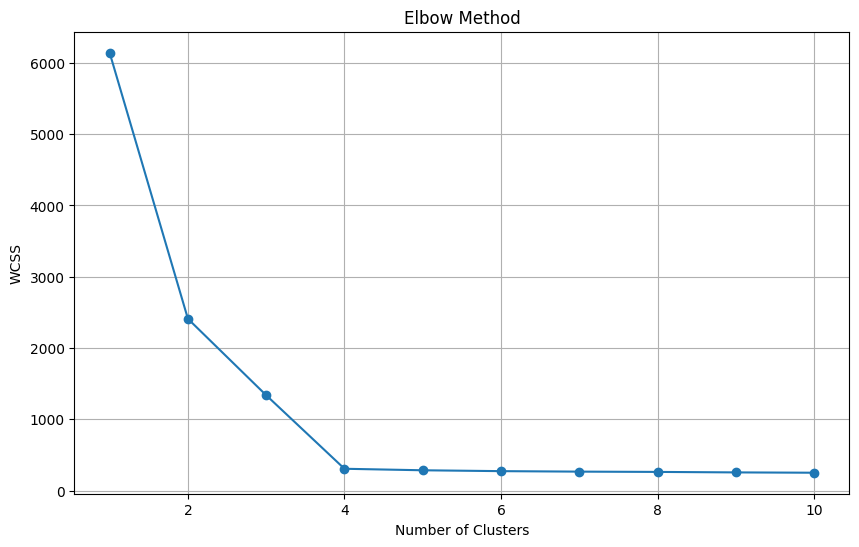

In [81]:
# Calcular el WCSS para diferentes numeros de clusters
wcss = []
max_clusters = 10

for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_kmeans[not_f])
    wcss.append(kmeans.inertia_)

# Plot la curva
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

### Análisis de Silueta

El índice de silueta mide qué tan similar es un objeto a su propio cluster en comparación con otros clusters. Un índice de silueta más alto indica una mejor agrupación.

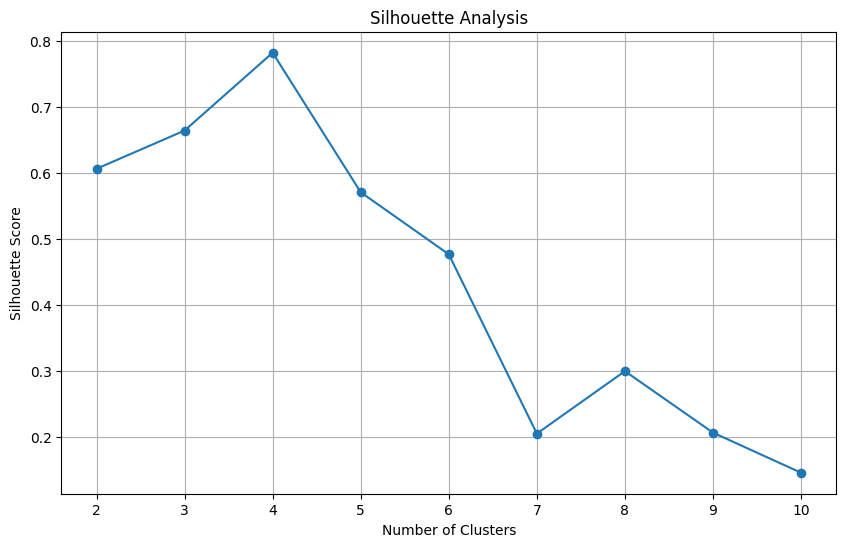

In [82]:
# Calucar los scores de silueta
sil_scores = []

for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_kmeans[not_f])
    score = silhouette_score(df_kmeans[not_f], labels)
    sil_scores.append(score)

# Plot los scores de silueta
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), sil_scores, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

### Estadística de Brecha (Gap Statistic)  

La estadística de brecha compara la variación total dentro de los clusters para diferentes valores de *k* con sus valores esperados bajo una distribución de referencia nula de los datos.

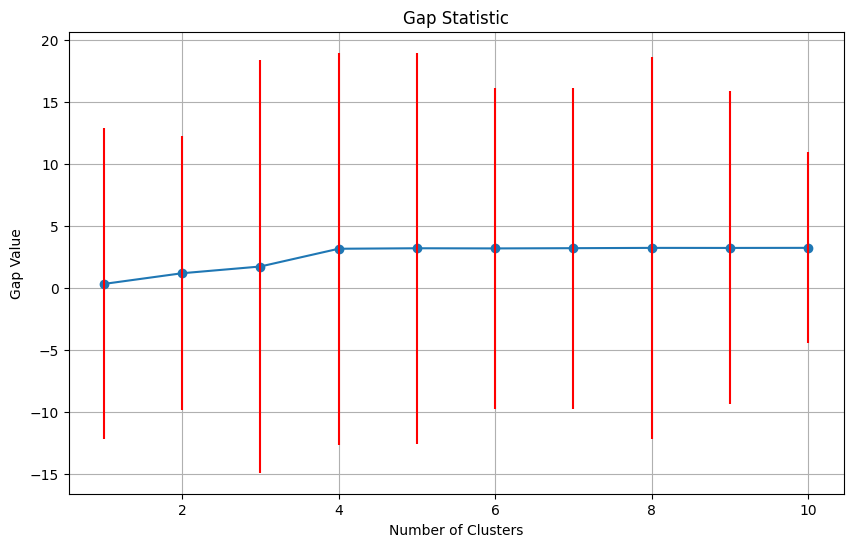

In [83]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import numpy as np

def compute_gap_statistic(X, max_clusters=10, n_refs=10):
    gaps = []
    sds = []
    
    # Generar datasets de referencia
    ref_data = np.random.rand(n_refs, X.shape[0], X.shape[1])
    
    for k in range(1, max_clusters + 1):
        # Fit K-means
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        orig_wcss = kmeans.inertia_
        
        # Calcular WCSS
        ref_wcss = []
        for ref in ref_data:
            kmeans.fit(ref)
            ref_wcss.append(kmeans.inertia_)
        
        # Calcular gap estadistico
        gap = np.log(np.mean(ref_wcss)) - np.log(orig_wcss)
        gaps.append(gap)
        
        # Calcular la desviacion estandar
        sd = np.sqrt(np.var(ref_wcss))
        sds.append(sd)
    
    return gaps, sds

# Computar el  gap estadistico
gaps, sds = compute_gap_statistic(df_kmeans[not_f])

# Plot el gap estadistico
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), gaps, marker='o')
plt.errorbar(range(1, max_clusters + 1), gaps, yerr=sds, fmt='none', ecolor='red')
plt.title('Gap Statistic')
plt.xlabel('Number of Clusters')
plt.ylabel('Gap Value')
plt.grid(True)
plt.show()

## K-means Seleccionado

Con base en los resultados del método del codo, el análisis de silueta y la estadística de Brecha, podemos seleccionar el número óptimo de clusters.

In [84]:
# Seleccionar el Numero Optimo de clusters que hayamos con el metodo del codo
optimal_clusters = 4  # This value should be determined from the plots

# Entrenar el Kmeans final
final_kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
final_kmeans.fit(df_kmeans[not_f])

# Agregar los labels de los clusters
df_kmeans['Cluster'] = final_kmeans.labels_

## Análisis de Clusters

Analiza las características de cada cluster para comprender los diferentes segmentos de clientes.

In [85]:
# Calcular los centroides
centroids = final_kmeans.cluster_centers_

# Dataframe para centroides
centroids_df = pd.DataFrame(centroids, columns=not_f)
centroids_df.index.name = 'Cluster'

# Display los Centroides
centroids_df

,SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,MESES_CLIENTE
Cluster,,,,,,,,,,,
0,0.233786,0.606708,0.862314,0.147286,0.236035,0.657962,0.239483,0.516655,0.485533,0.423552,0.060546
1,0.695787,0.829317,0.150424,0.865000,0.789837,0.752809,0.578001,0.483744,0.168715,0.757858,0.643158
2,0.855269,0.150753,0.770818,0.485821,0.461604,0.428391,0.464666,0.144046,0.407111,0.718417,0.304464
3,0.163407,0.537180,0.761733,0.466118,0.198157,0.241909,0.795961,0.870623,0.862073,0.217949,0.766347


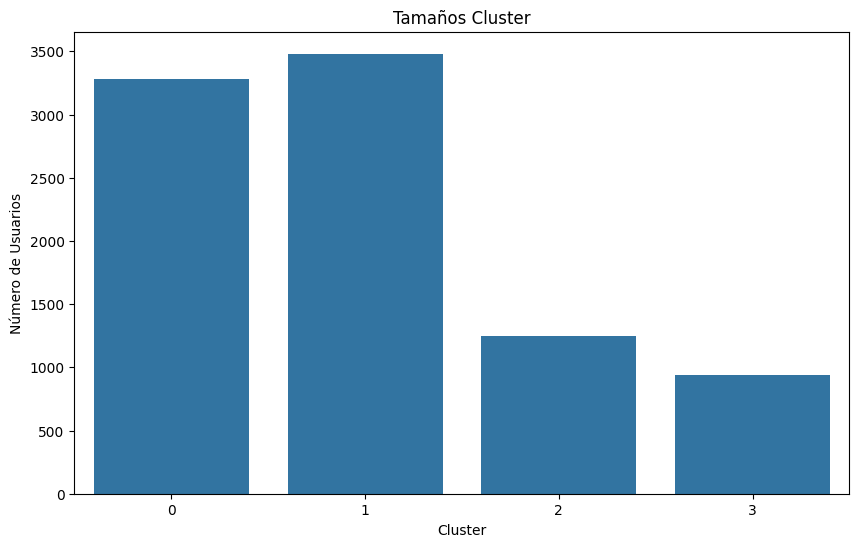

In [86]:
# Calcular tamanios de clusters
cluster_sizes = df_kmeans['Cluster'].value_counts().sort_index()

# Plot los tamanios de los clusters
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values)
plt.title('Tamaños Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Usuarios')
plt.show()

## Evaluamos el Modelo

In [87]:
import pandas as pd

def analyze_clusters(df, cluster_col="Cluster"):
    """Genera métricas para cada cluster y compara con la media general."""

    # Filtrar solo columnas numéricas (evita el error)
    numeric_df = df.select_dtypes(include=["number"]).copy()

    # Obtener conteo de clientes por cluster
    cluster_sizes = numeric_df[cluster_col].value_counts().rename("Cluster Size")

    # Calcular métricas clave por cluster
    cluster_means = numeric_df.groupby(cluster_col).mean()
    cluster_std = numeric_df.groupby(cluster_col).std()

    # Comparar cada cluster con la media general
    overall_mean = numeric_df.drop(columns=[cluster_col]).mean()
    comparison = cluster_means.subtract(overall_mean)

    # Mostrar resultados
    print("Tamaño de cada Cluster:\n", cluster_sizes, "\n")
    print("Promedio de cada variable por Cluster:\n", cluster_means, "\n")
    print("Desviación estándar por Cluster:\n", cluster_std, "\n")
    print("Diferencia con la media general:\n", comparison, "\n")

    return cluster_sizes, cluster_means, cluster_std, comparison

# Llamar a la función con el DataFrame de clusters
cluster_sizes, cluster_means, cluster_std, comparison = analyze_clusters(df_kmeans)


Tamaño de cada Cluster:
 Cluster
1    3481
0    3284
2    1247
3     938
Name: Cluster Size, dtype: int64 

Promedio de cada variable por Cluster:
             SALDO   F_SALDO   COMPRAS  COMPRAS_PUNTUALES  COMPRAS_PLAZOS  \
Cluster                                                                    
0        0.233786  0.193595  0.606708           0.862314        0.147286   
1        0.695787  0.775723  0.829317           0.150424        0.865000   
2        0.855269  0.180956  0.150753           0.770818        0.485821   
3        0.163407  0.584411  0.537180           0.761733        0.466118   

         AVANCE_EFECTIVO  F_COMPRAS  F_COMPRAS_PUNTUALES  F_COMPRAS_PLAZOS  \
Cluster                                                                      
0               0.236035   0.425656             0.567211          0.838359   
1               0.789837   0.797962             0.227420          0.535079   
2               0.461604   0.513903             0.702562          0.642635   
3    

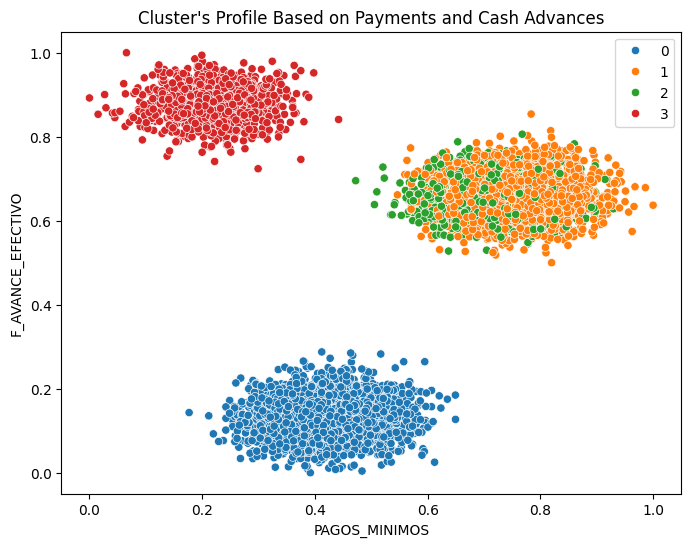

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

# Paleta con más variedad de colores
palette = sns.color_palette("tab10", n_colors=df_kmeans["Cluster"].nunique())

sns.scatterplot(data=df_kmeans, 
                x="PAGOS_MINIMOS", 
                y="F_AVANCE_EFECTIVO", 
                hue="Cluster", 
                palette=palette)

plt.title("Cluster's Profile Based on Payments and Cash Advances")
plt.legend()
plt.show()


# Tabla comparativa

La calidad desde el punto de vista cuantitativo puede validarse utilizando diferentes métricas intrínsecas, como el coeficiente de silueta.

---------------------------------------
# Modelo Gaussian Mixture Models (GMM) - Daniel F. Ortiz

Es un algoritmo de clustering basado en probabilidad. Asume que los datos provienen de una combinación (mezcla) de distribuciones normales multivariadas (Gaussianas). A diferencia de K-Means, GMM permite que un punto tenga una probabilidad de pertenecer a varios clusters, lo que permite segmentaciones suaves. Es útil cuando los grupos tienen formas elípticas o se solapan parcialmente.


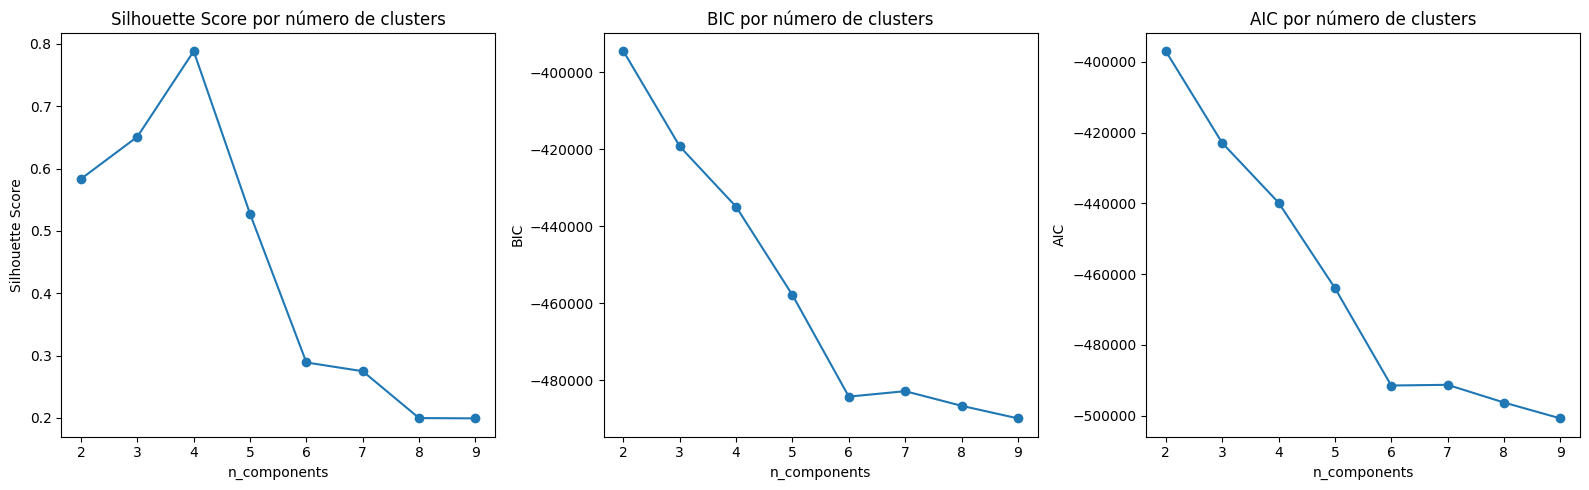

In [90]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Usamos el dataframe ya escalado: `transformed_df`
X = transformed_df.drop(columns=['ID'])

# Prueba con varios valores de k para comparar
silhouette_scores = []
bic_scores = []
aic_scores = []
range_n = range(2, 10)

for k in range_n:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X)
    labels = gmm.predict(X)
    
    silhouette = silhouette_score(X, labels)
    silhouette_scores.append(silhouette)
    bic_scores.append(gmm.bic(X))
    aic_scores.append(gmm.aic(X))

# Plot evaluación por cantidad de clusters
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
plt.plot(range_n, silhouette_scores, marker='o')
plt.title('Silhouette Score por número de clusters')
plt.xlabel('n_components')
plt.ylabel('Silhouette Score')

plt.subplot(1,3,2)
plt.plot(range_n, bic_scores, marker='o')
plt.title('BIC por número de clusters')
plt.xlabel('n_components')
plt.ylabel('BIC')

plt.subplot(1,3,3)
plt.plot(range_n, aic_scores, marker='o')
plt.title('AIC por número de clusters')
plt.xlabel('n_components')
plt.ylabel('AIC')

plt.tight_layout()
plt.show()


Podemos ver que el codo en las funciones BIC y AIC esta en 6, pero el mejor score de la silueta esta en 4. Dado que el objetivo de FinanzasAlpes es segmentar a sus clientes según su comportamiento de compra para diseñar estrategias de marketing personalizadas, se requiere una segmentación clara, interpretable y accionable desde el punto de vista del negocio. Aunque las métricas estadísticas AIC y BIC sugieren que el modelo mejora hasta 6 clusters, el análisis del coeficiente de silueta indica que con 4 clusters se obtiene la mayor cohesión interna y separación entre grupos, lo que favorece una comprensión más clara de los perfiles de clientes. Por tanto, se recomienda utilizar 4 clusters como número óptimo, ya que facilita la interpretación por parte de la organización y permite construir estrategias diferenciadas para cada perfil, sin perder calidad analítica ni saturar el modelo con agrupaciones poco diferenciadas.

Silhouette Score promedio para k=4: 0.7883


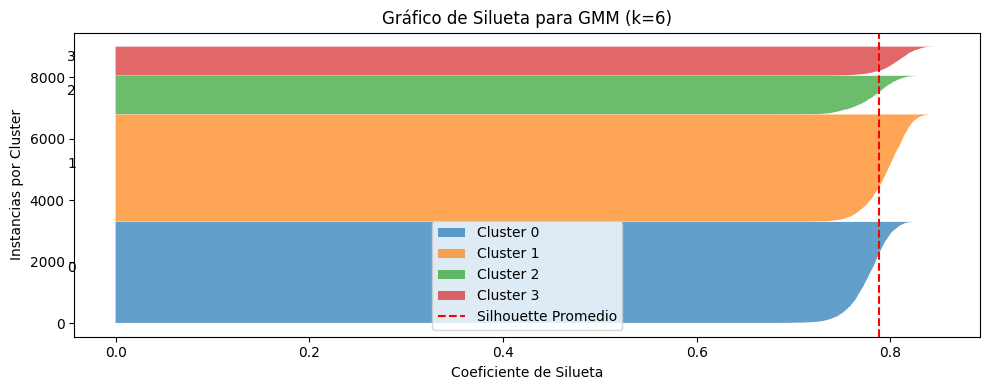

In [111]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Datos sin la columna ID ni GMM_Cluster
X = gmm_df.drop(columns=['ID', 'GMM_Cluster'])

# Obtener etiquetas del modelo GMM que ya entrenaste
labels = gmm_df['GMM_Cluster']

# Calcular el score promedio de silueta
avg_score = silhouette_score(X, labels)
print(f"Silhouette Score promedio para k=4: {avg_score:.4f}")

# Calcular el score individual por muestra
silhouette_vals = silhouette_samples(X, labels)

# Crear el gráfico
plt.figure(figsize=(10, 4))
y_lower = 10
for i in range(4):
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()
    size_cluster_i = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_vals,
                      alpha=0.7, label=f'Cluster {i}')
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

# Línea del promedio
plt.axvline(avg_score, color="red", linestyle="--", label="Silhouette Promedio")

plt.title("Gráfico de Silueta para GMM (k=6)")
plt.xlabel("Coeficiente de Silueta")
plt.ylabel("Instancias por Cluster")
plt.legend()
plt.tight_layout()
plt.show()


Entonces esogemos los 4 clusters, y creamos nuestro modelo.

In [113]:
best_k = 4
gmm_final = GaussianMixture(n_components=best_k, random_state=42)
gmm_final.fit(X)
labels_gmm = gmm_final.predict(X)

gmm_df = transformed_df.copy()

# Agrega etiquetas al dataset
gmm_df['GMM_Cluster'] = labels_gmm


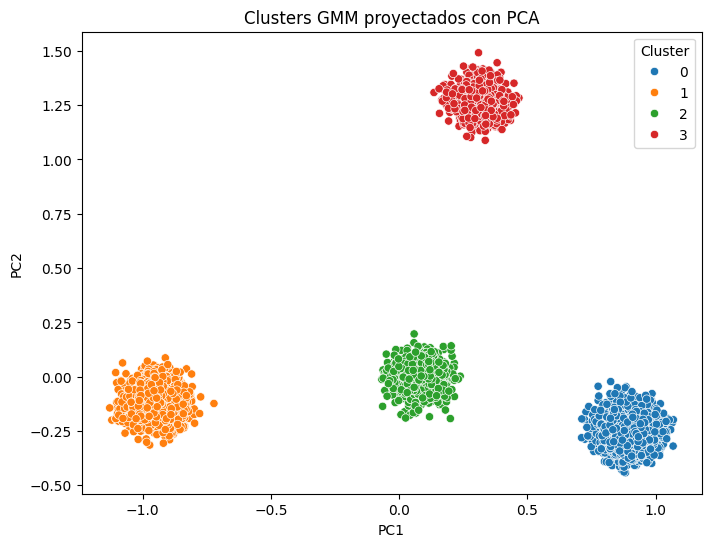

In [114]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_gmm, palette='tab10')
plt.title('Clusters GMM proyectados con PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()


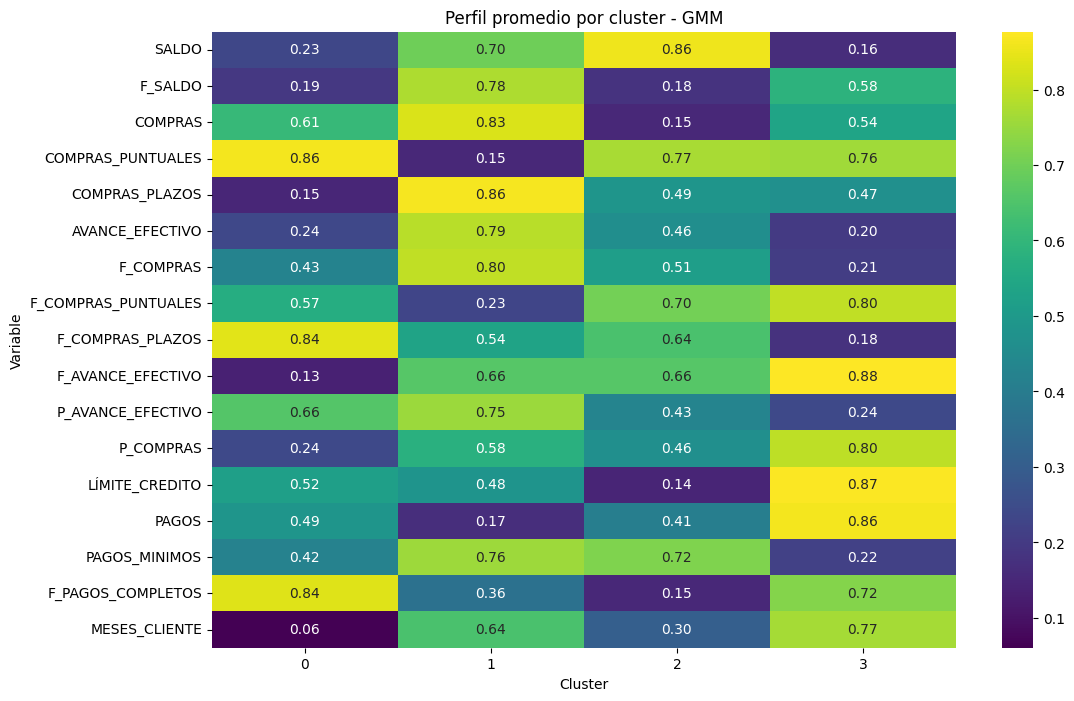

In [115]:
numerical_cols = gmm_df.select_dtypes(include=['number']).columns.drop('GMM_Cluster')

# Agrupar y calcular promedios sólo sobre columnas numéricas
cluster_profile = gmm_df.groupby('GMM_Cluster')[numerical_cols].mean().T

# Graficar el perfil promedio por cluster
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(cluster_profile, annot=True, cmap='viridis', fmt=".2f")
plt.title("Perfil promedio por cluster - GMM")
plt.ylabel("Variable")
plt.xlabel("Cluster")
plt.show()


------------------------------------

# Conclusiones

Derivar conclusiones a partir de los mejores grupos identificados, que sean útiles para la organización.

# Hallazgos encontrados

Comunicar los hallazgos encontrados a la organización, explicando por qué tienen valor para el negocio.